Install dependencies


In [1]:
!pip uninstall torch -y
!pip uninstall torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

!curl -s https://course.fast.ai/setup/colab | bash
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Uninstalling torch-1.5.0+cu101:
  Successfully uninstalled torch-1.5.0+cu101
Uninstalling torchvision-0.6.0+cu101:
  Successfully uninstalled torchvision-0.6.0+cu101
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 4.0MB 33.7MB/s 
Updating fastai...
Done.


Setup google drive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Install libraries


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Install data - only has to be done once (as it is stored in Google drive)


In [7]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.0MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=7a69101f86c00e47f1dbbb4dddcb3dda1d3434404cbd3c504500402fdd56c00d
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [0]:
# set kaggle json dir
import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My \Drive/fastai-v3/.kaggle/"
os.environ['KAGGLE_USERNAME'] = "marcospereira"
os.environ['KAGGLE_KEY'] = "rawpizzaneedsanoven"

In [9]:
# install dataset
%cd /content/gdrive/My Drive/fastai-v3
!mkdir test
%cd /content/gdrive/My Drive/fastai-v3/test
!kaggle competitions download -c plant-pathology-2020-fgvc7

/content/gdrive/My Drive/fastai-v3
mkdir: cannot create directory ‘test’: File exists
/content/gdrive/My Drive/fastai-v3/test
plant-pathology-2020-fgvc7.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
#unzipping the zip files and deleting the zip files
!unzip plant-pathology-2020-fgvc7

Archive:  plant-pathology-2020-fgvc7.zip
replace images/Test_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: images/Test_0.jpg       
  inflating: images/Test_1.jpg       
  inflating: images/Test_10.jpg      
  inflating: images/Test_100.jpg     
  inflating: images/Test_1000.jpg    
  inflating: images/Test_1001.jpg    
  inflating: images/Test_1002.jpg    
  inflating: images/Test_1003.jpg    
  inflating: images/Test_1004.jpg    
  inflating: images/Test_1005.jpg    
  inflating: images/Test_1006.jpg    
  inflating: images/Test_1007.jpg    
  inflating: images/Test_1008.jpg    
  inflating: images/Test_1009.jpg    
  inflating: images/Test_101.jpg     
  inflating: images/Test_1010.jpg    
  inflating: images/Test_1011.jpg    
  inflating: images/Test_1012.jpg    
  inflating: images/Test_1013.jpg    
  inflating: images/Test_1014.jpg    
  inflating: images/Test_1015.jpg    
  inflating: images/Test_1016.jpg    
  inflating: images/Test_1017.jpg    
  inflating: image

Setup ImageDataBunch


In [16]:
%cd /content/gdrive/My Drive/fastai-v3/plant_pathology
!rm 'train_parsed.csv'

from csv import reader

def create_row(old_row):
  row_data = {}
  row_data['image_id'] = old_row['image_id']
  if old_row['healthy'] == '1':
    row_data['class'] = 'healthy'
  elif old_row['multiple_diseases'] == '1':
    row_data['class'] = 'multiple_diseases'
  elif old_row['rust'] == '1':
    row_data['class'] = 'rust'
  elif old_row['scab'] == '1':
    row_data['class'] = 'scab'
  return row_data

def create_file(file_name):
  with open(file_name, 'w') as new_file:
    writer = csv.DictWriter(new_file, fieldnames=['image_id', 'class'])
    with open('train.csv') as old_file:
      for row in csv.DictReader(old_file):
        writer.writerow(create_row(row))

create_file('train_parsed.csv')

/content/gdrive/My Drive/fastai-v3/test


In [0]:
data = ImageDataBunch.from_csv(path=base_dir + "/plant_pathology", folder="images", csv_labels="train_parsed.csv", suffix='.jpg', ds_tfms=get_transforms(), size=244, bs=32).normalize(imagenet_stats)

In [18]:
print(data.classes)
print(data.c)

['healthy', 'multiple_diseases', 'rust', 'scab']
4


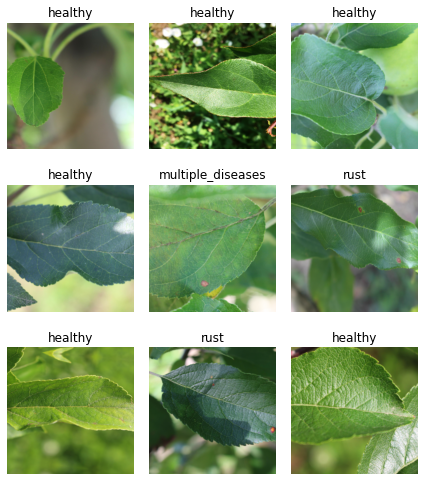

In [19]:
data.show_batch(rows=3, figsize=(6,7))

Training

In [0]:
learn = cnn_learner(data, models.resnet152, metrics=error_rate)

In [26]:
# make sure we have a gpu to train on and see which one it is
import torch
print(torch.__version__)
print(torch.cuda.device(0))
torch.cuda.empty_cache()
torch.cuda.is_available()

use_cuda = True
print(torch.cuda.is_available())

1.4.0
True


In [28]:
!nvidia-smi

Sat May  9 17:55:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    72W / 149W |    805MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.987497,0.697117,0.170330,02:55
1,0.696556,0.546365,0.129121,02:51
2,0.437617,0.440475,0.129121,02:54
3,0.314318,0.448811,0.118132,02:51


In [0]:
learn.save('stage-1')

In [0]:
learn.freeze()

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
losses,indexes = interp.top_losses()

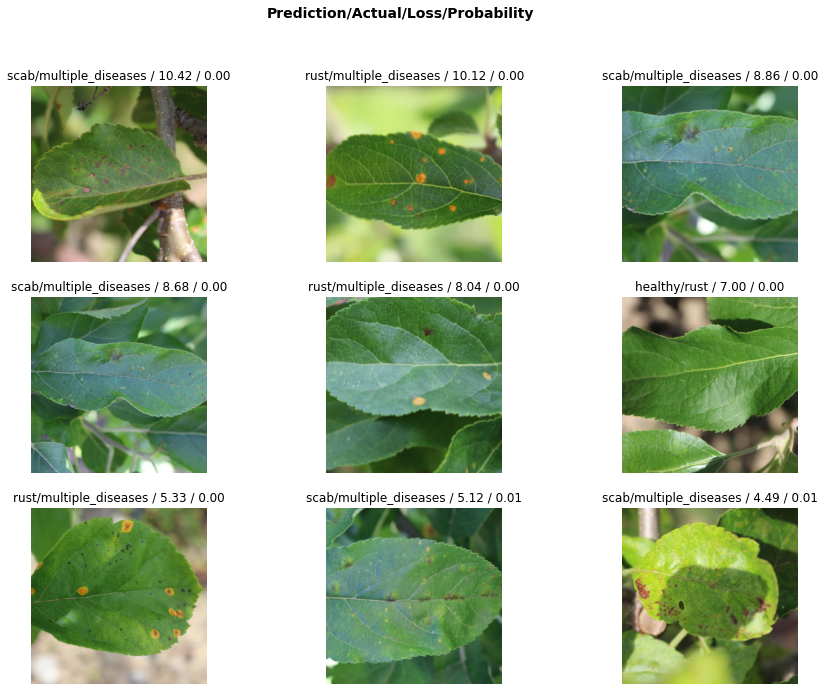

In [32]:
interp.plot_top_losses(9, figsize=(15,11))

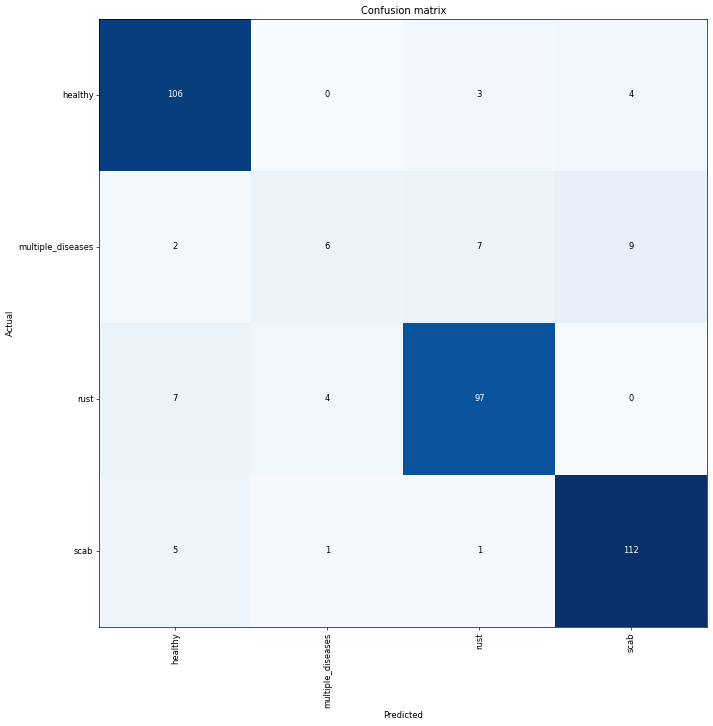

In [33]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.load('stage-1');

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


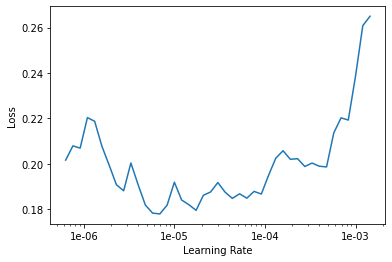

In [42]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(1, max_lr=slice(1e-5, 1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.251614,0.408713,0.115385,03:13


In [0]:
learn.unfreeze()

In [49]:
learn.fit_one_cycle(1, max_lr=slice(1e-5, 1e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.203646,0.413605,0.115385,03:13


In [50]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-7))

epoch,train_loss,valid_loss,error_rate,time
0,0.197234,0.407090,0.115385,03:09
1,0.211180,0.398714,0.112637,03:12
2,0.179175,0.382743,0.107143,03:13
3,0.179620,0.381717,0.104396,03:10


In [0]:
learn.save('stage-2')

In [52]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-7))

epoch,train_loss,valid_loss,error_rate,time
0,0.161799,0.387411,0.107143,03:06
1,0.179720,0.400736,0.109890,03:03


KeyboardInterrupt: ignored

Inference


In [53]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (1456 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
multiple_diseases,healthy,healthy,multiple_diseases,scab
Path: /content/gdrive/My Drive/fastai-v3/plant_pathology;

Valid: LabelList (364 items)
x: ImageList
Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244),Image (3, 244, 244)
y: CategoryList
scab,scab,scab,rust,rust
Path: /content/gdrive/My Drive/fastai-v3/plant_pathology;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=F

In [0]:
learn.export()

In [0]:
learn = load_learner('/content/gdrive/My Drive/fastai-v3/plant_pathology')

In [55]:
%cd /content/gdrive/My Drive/fastai-v3/plant_pathology
!rm output.csv

print_interval = 50
classes = ['healthy', 'multiple_diseases', 'rust', 'scab']
base_path = '/content/gdrive/My Drive/fastai-v3/plant_pathology/images/'

def get_predictions(image_id, image_number):
  predicted_class,_,probabilities = learn.predict(open_image(base_path + image_id + '.jpg'))
  output_dict = {}
  output_dict["image_id"] = image_id
  for idx,clazz in enumerate(classes):
    # add prediction value for each class with 10 digits
    output_dict[clazz] = '{:.10f}'.format(probabilities.numpy()[idx])
  # document progress every [print_interval]th image
  if image_number % print_interval == 0:
    print(image_id + " - " + str(predicted_class) + ' - ' + str(probabilities.numpy()))

  return output_dict

def create_output_csv(input_csv, output_csv):
  with open(output_csv, 'w') as output:
    writer = csv.DictWriter(output, fieldnames=['image_id'] + classes)
    writer.writeheader()
    with open(input_csv) as input:
      # add row for each image with predictions
      for idx,(row) in enumerate(csv.DictReader(input)):
        writer.writerow(get_predictions(row['image_id'], idx))

create_output_csv('test.csv', 'output.csv')

/content/gdrive/My Drive/fastai-v3/test
rm: cannot remove 'output.csv': No such file or directory
Test_0 - rust - [1.514240e-05 7.118518e-04 9.992729e-01 6.586714e-08]
Test_50 - rust - [7.547404e-09 3.001188e-05 9.999700e-01 4.214959e-10]
Test_100 - scab - [6.207593e-04 1.835020e-03 2.869663e-05 9.975156e-01]
Test_150 - rust - [0.002508 0.243863 0.390372 0.363257]
Test_200 - rust - [7.284117e-07 1.974057e-04 9.998018e-01 7.686363e-08]
Test_250 - healthy - [9.997244e-01 4.086071e-06 2.652331e-04 6.168495e-06]
Test_300 - multiple_diseases - [0.226147 0.439062 0.008642 0.326149]
Test_350 - scab - [5.153270e-05 1.320871e-04 3.409199e-06 9.998130e-01]
Test_400 - rust - [1.008864e-07 3.496876e-04 9.996502e-01 6.812936e-10]
Test_450 - rust - [2.786623e-04 5.322671e-05 9.996680e-01 1.136627e-07]
Test_500 - rust - [4.380609e-04 5.986626e-04 9.989632e-01 1.398414e-08]
Test_550 - scab - [1.567052e-02 2.535737e-02 5.298568e-05 9.589191e-01]
Test_600 - rust - [2.760696e-08 1.524700e-01 8.475299e-01